In [ ]:
Priyal Saini
21BTRCL080

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None
        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


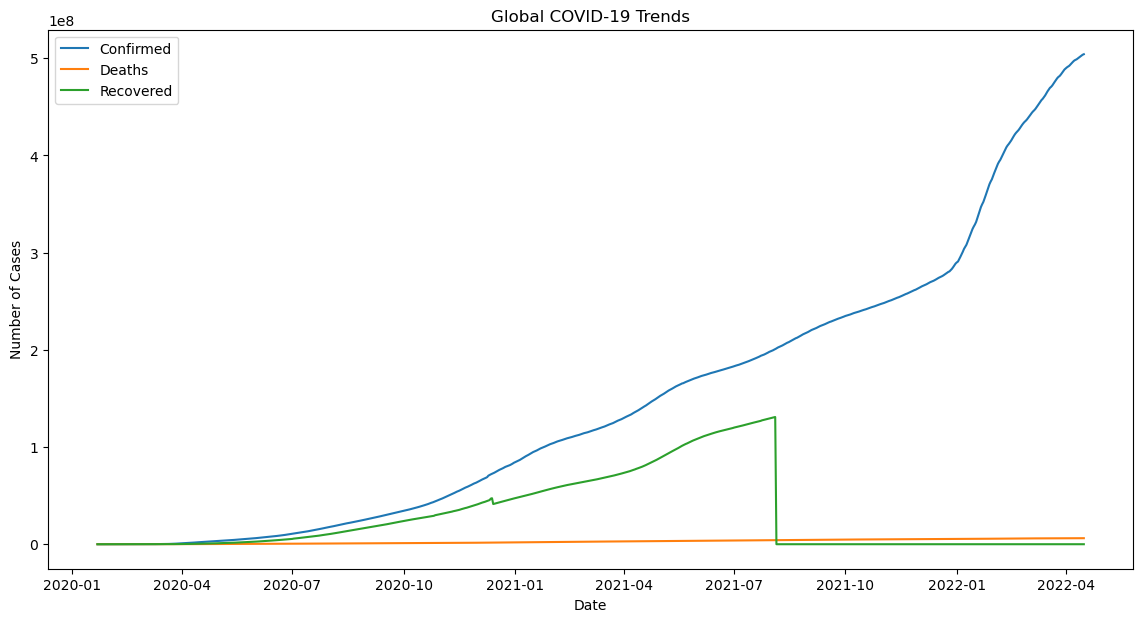

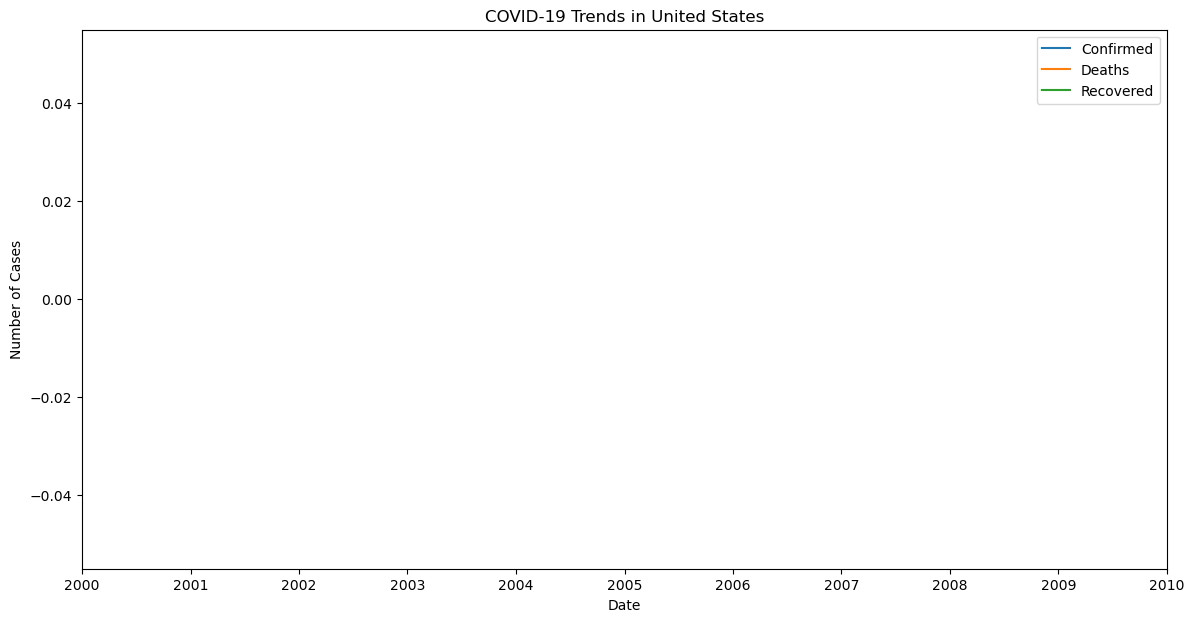

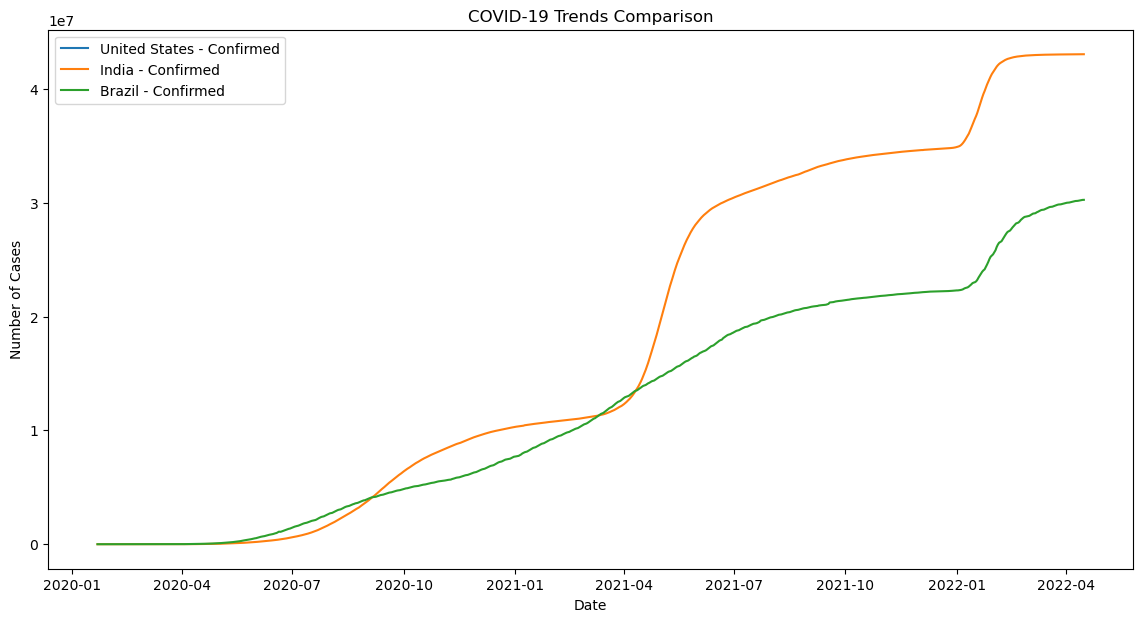

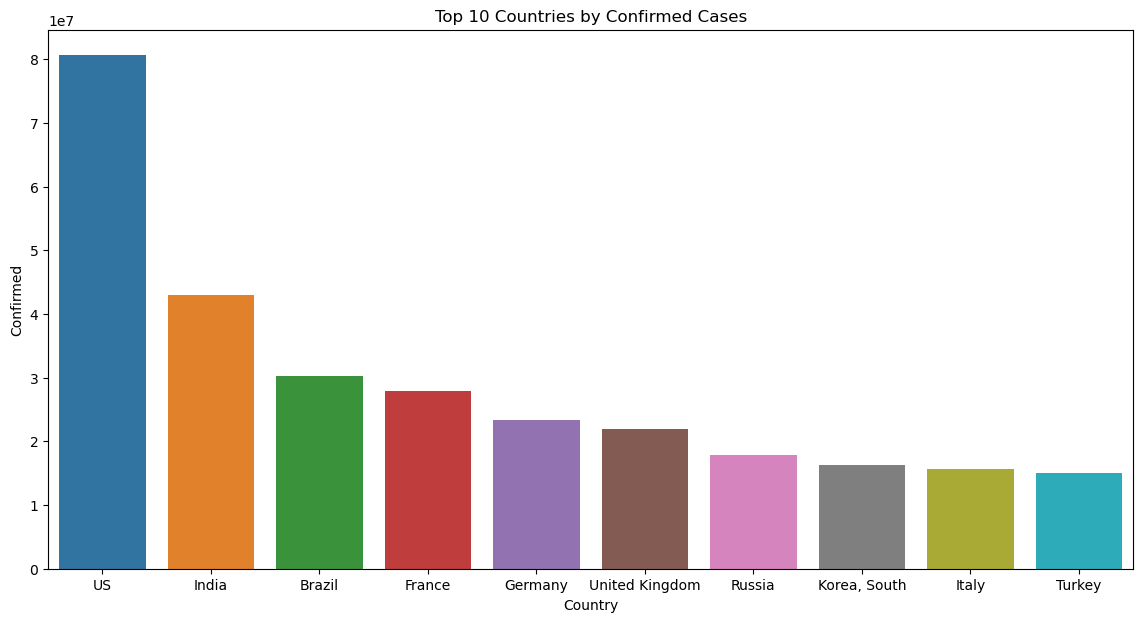

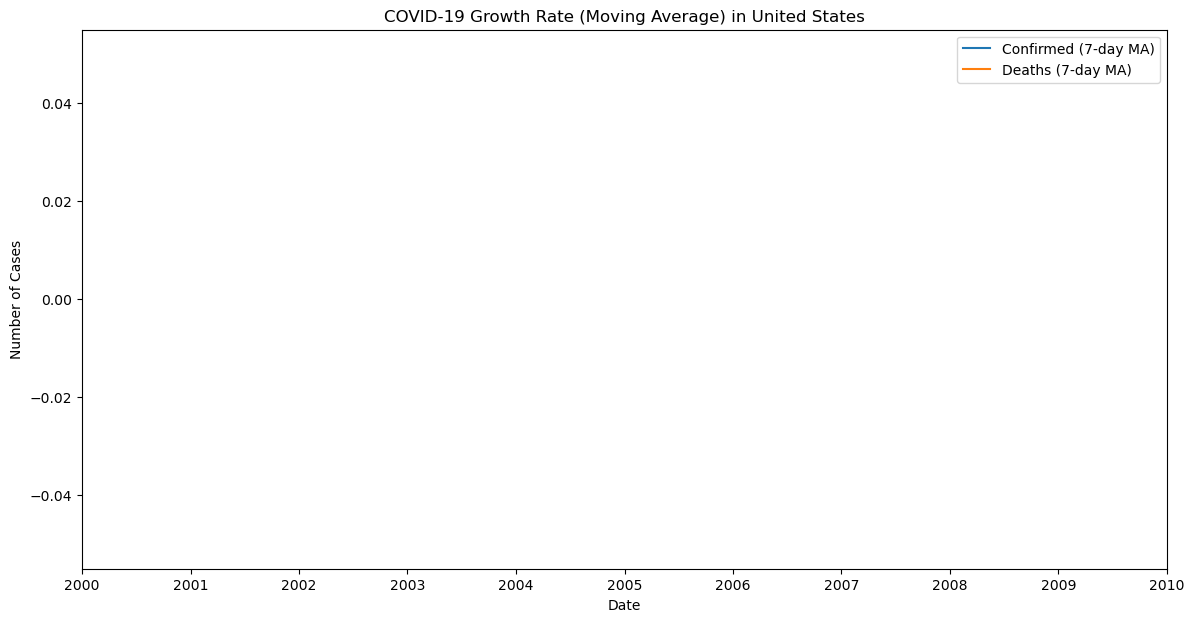

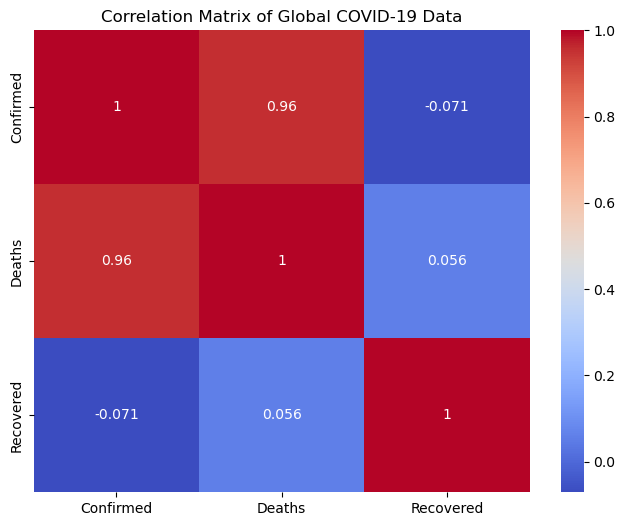

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)

print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])

print(df.info())
print(df.head())

global_df = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Global COVID-19 Trends')
plt.legend()
plt.show()

def plot_country_trends(country):
    country_df = df[df['Country'] == country]
    plt.figure(figsize=(14, 7))
    plt.plot(country_df['Date'], country_df['Confirmed'], label='Confirmed')
    plt.plot(country_df['Date'], country_df['Deaths'], label='Deaths')
    plt.plot(country_df['Date'], country_df['Recovered'], label='Recovered')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title(f'COVID-19 Trends in {country}')
    plt.legend()
    plt.show()

plot_country_trends('United States')

def compare_countries(countries):
    plt.figure(figsize=(14, 7))
    for country in countries:
        country_df = df[df['Country'] == country]
        plt.plot(country_df['Date'], country_df['Confirmed'], label=f'{country} - Confirmed')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title('COVID-19 Trends Comparison')
    plt.legend()
    plt.show()

compare_countries(['United States', 'India', 'Brazil'])

latest_df = df[df['Date'] == df['Date'].max()]

top10_df = latest_df.nlargest(10, 'Confirmed')

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Confirmed', data=top10_df)
plt.title('Top 10 Countries by Confirmed Cases')
plt.show()

df['Confirmed_MA'] = df.groupby('Country')['Confirmed'].transform(lambda x: x.rolling(window=7).mean())
df['Deaths_MA'] = df.groupby('Country')['Deaths'].transform(lambda x: x.rolling(window=7).mean())

country = 'United States'
country_df = df[df['Country'] == country]

plt.figure(figsize=(14, 7))
plt.plot(country_df['Date'], country_df['Confirmed_MA'], label='Confirmed (7-day MA)')
plt.plot(country_df['Date'], country_df['Deaths_MA'], label='Deaths (7-day MA)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title(f'COVID-19 Growth Rate (Moving Average) in {country}')
plt.legend()
plt.show()

correlation_matrix = global_df[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Global COVID-19 Data')
plt.show()


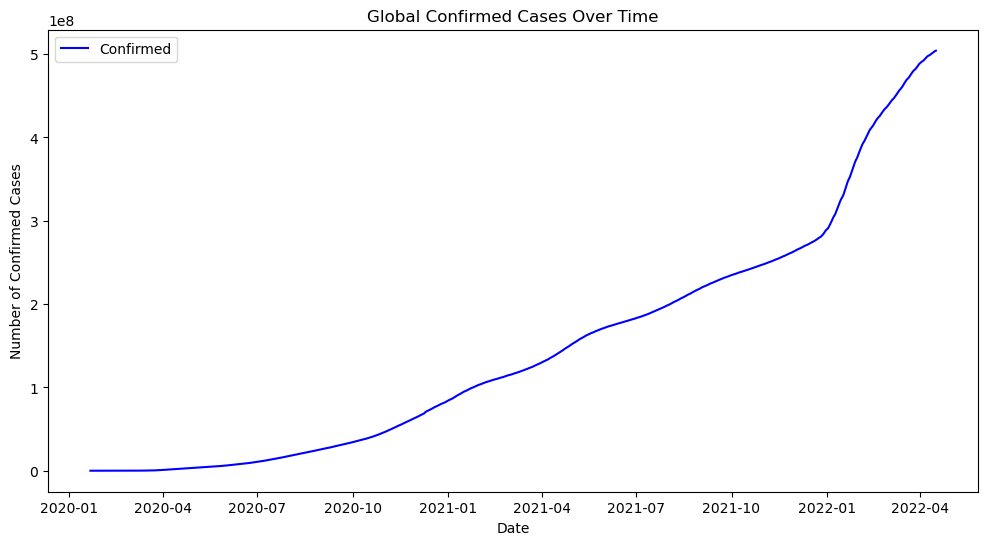

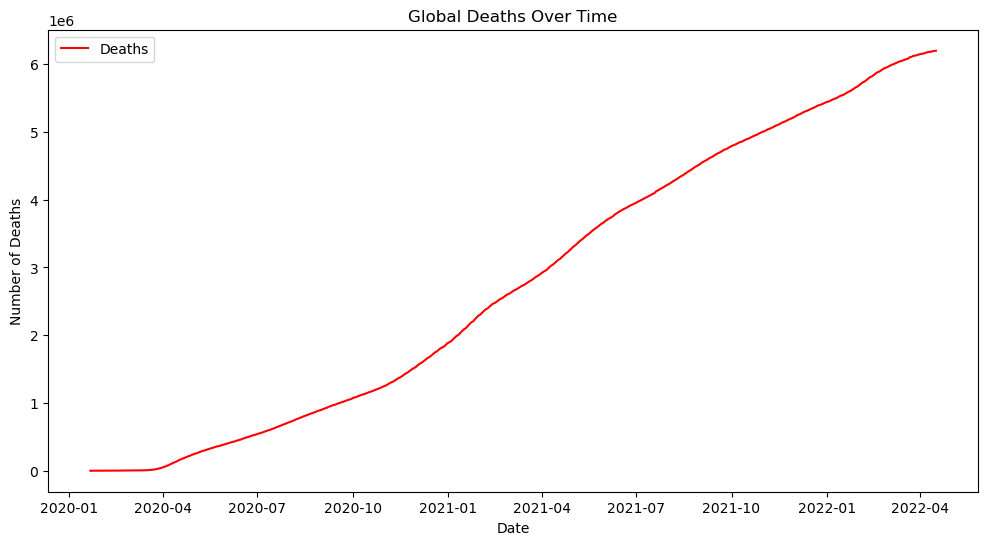

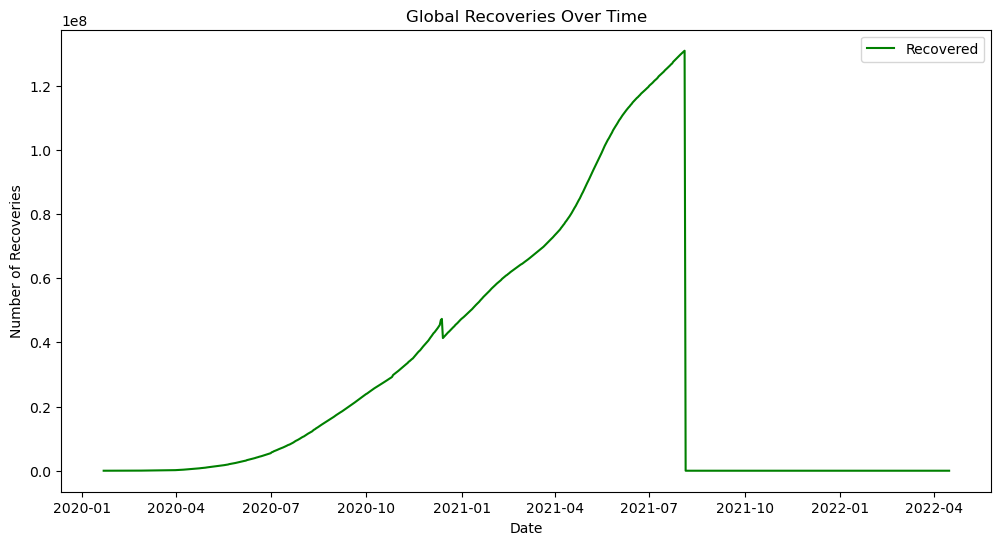

In [2]:
#1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw plots separately.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

global_df = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.title('Global Confirmed Cases Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Global Deaths Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.title('Global Recoveries Over Time')
plt.legend()
plt.show()


In [3]:
#2. Which country has the highest number of confirmed cases, deaths, and recoveries as of the latest date in the dataset?

latest_date = df['Date'].max()
latest_df = df[df['Date'] == latest_date]

max_confirmed = latest_df.loc[latest_df['Confirmed'].idxmax()]
max_deaths = latest_df.loc[latest_df['Deaths'].idxmax()]
max_recoveries = latest_df.loc[latest_df['Recovered'].idxmax()]

print(f"Country with the highest confirmed cases: {max_confirmed['Country']} ({max_confirmed['Confirmed']})")
print(f"Country with the highest deaths: {max_deaths['Country']} ({max_deaths['Deaths']})")
print(f"Country with the highest recoveries: {max_recoveries['Country']} ({max_recoveries['Recovered']})")



Country with the highest confirmed cases: US (80625120)
Country with the highest deaths: US (988609)
Country with the highest recoveries: Afghanistan (0)


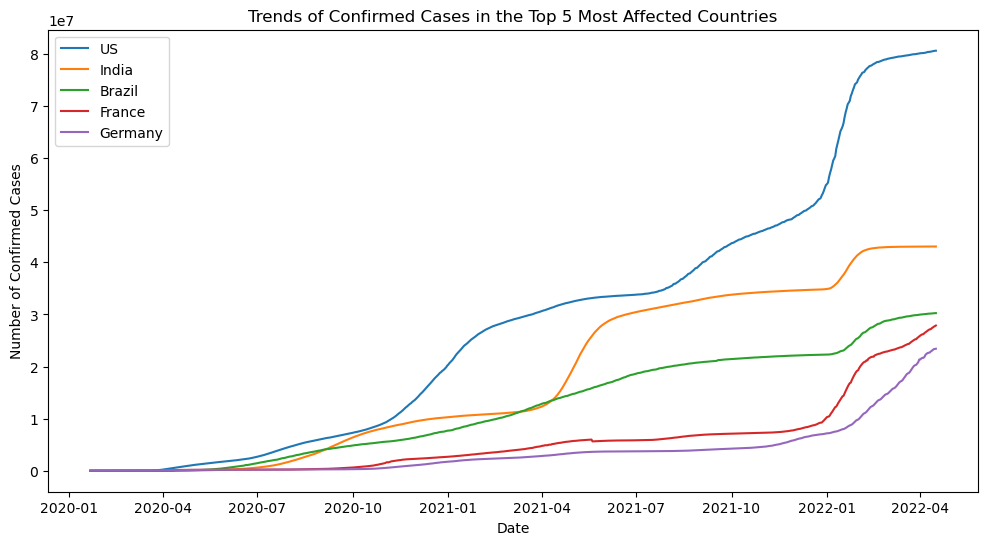

In [4]:
#3. How do the trends of confirmed cases differ between the top 5 most affected countries?

top5_countries = latest_df.nlargest(5, 'Confirmed')['Country']

plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_df = df[df['Country'] == country]
    plt.plot(country_df['Date'], country_df['Confirmed'], label=country)

plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.title('Trends of Confirmed Cases in the Top 5 Most Affected Countries')
plt.legend()
plt.show()


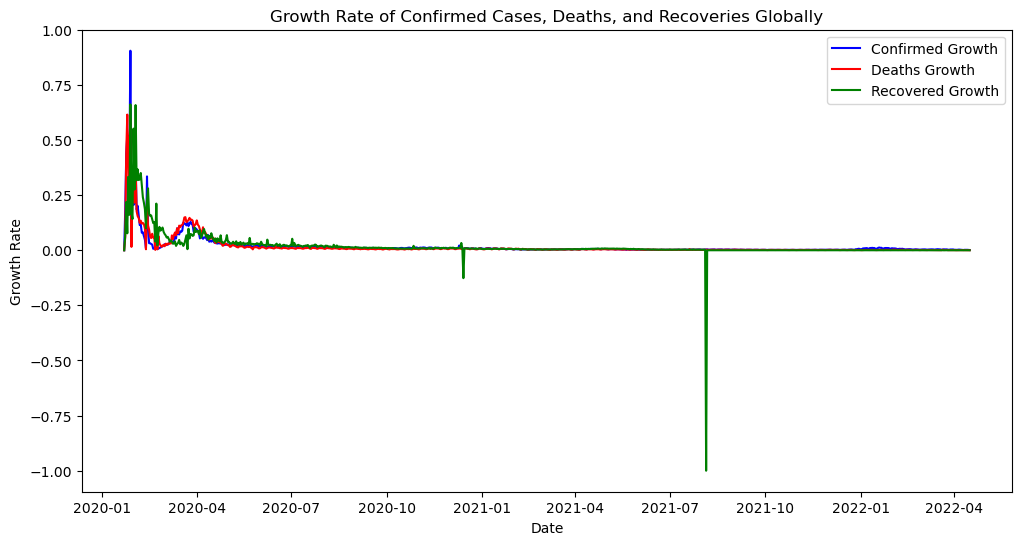

In [5]:
#4. What is the growth rate of confirmed cases, deaths, and recoveries globally?
global_df['Confirmed_Growth'] = global_df['Confirmed'].pct_change().fillna(0)
global_df['Deaths_Growth'] = global_df['Deaths'].pct_change().fillna(0)
global_df['Recovered_Growth'] = global_df['Recovered'].pct_change().fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(global_df['Date'], global_df['Confirmed_Growth'], label='Confirmed Growth', color='blue')
plt.plot(global_df['Date'], global_df['Deaths_Growth'], label='Deaths Growth', color='red')
plt.plot(global_df['Date'], global_df['Recovered_Growth'], label='Recovered Growth', color='green')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of Confirmed Cases, Deaths, and Recoveries Globally')
plt.legend()
plt.show()


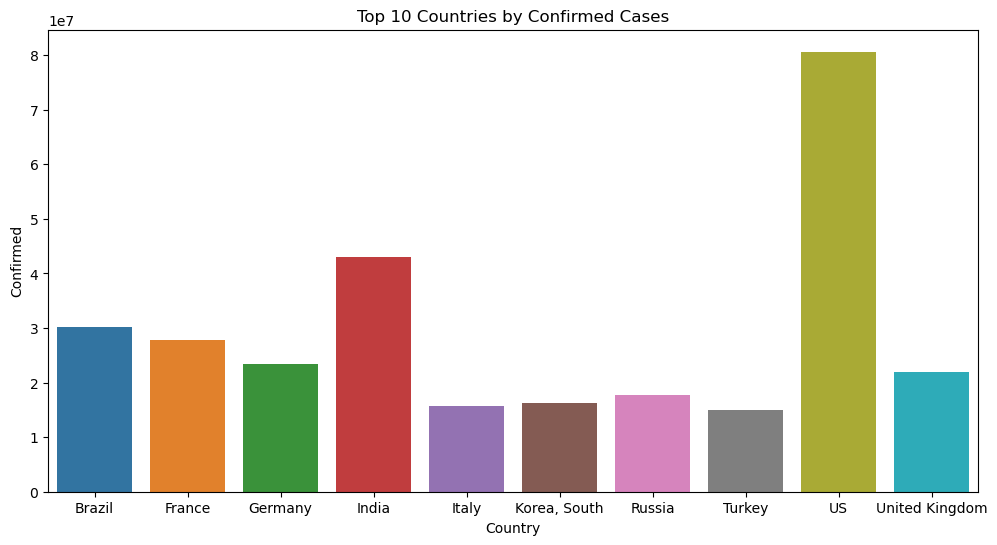

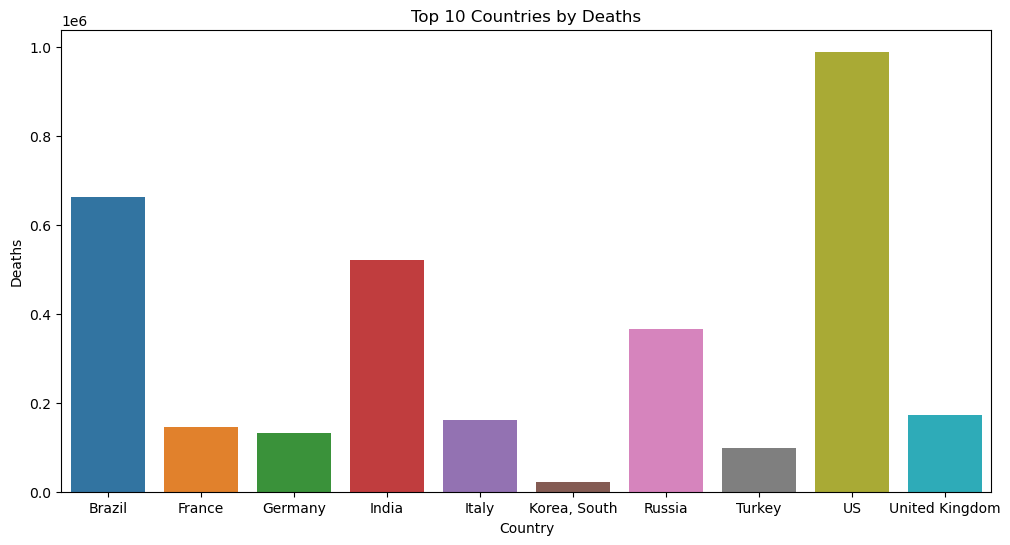

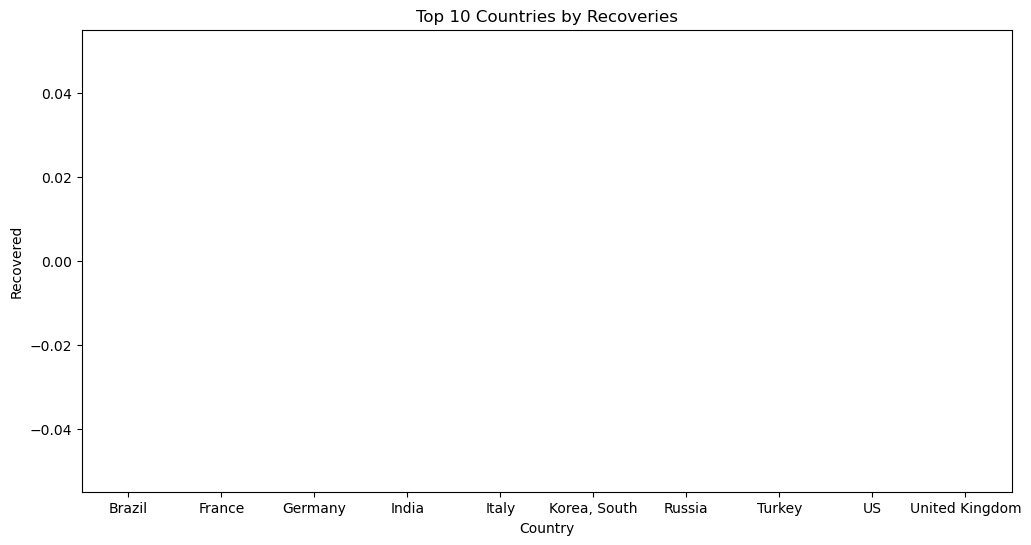

In [6]:
#5. What are the cumulative confirmed cases, deaths, and recoveries for the top 10 mostaffected countries?
top10_countries = latest_df.nlargest(10, 'Confirmed')['Country']

top10_df = df[df['Country'].isin(top10_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Confirmed', data=latest_df[latest_df['Country'].isin(top10_countries)])
plt.title('Top 10 Countries by Confirmed Cases')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Deaths', data=latest_df[latest_df['Country'].isin(top10_countries)])
plt.title('Top 10 Countries by Deaths')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Recovered', data=latest_df[latest_df['Country'].isin(top10_countries)])
plt.title('Top 10 Countries by Recoveries')
plt.show()


C:\Users\Priyal\AppData\Local\Temp\ipykernel_28476\1150298654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['Recovery_Rate'] = latest_df['Recovered'] / latest_df['Confirmed'] * 100


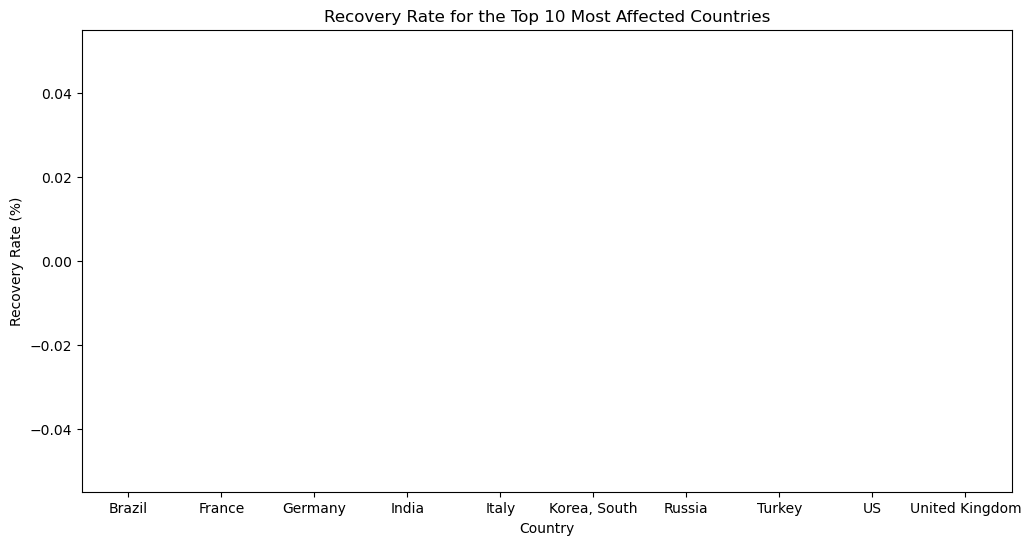

In [7]:
#6. How does the recovery rate compare across different countries?
latest_df['Recovery_Rate'] = latest_df['Recovered'] / latest_df['Confirmed'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Recovery_Rate', data=latest_df[latest_df['Country'].isin(top10_countries)])
plt.title('Recovery Rate for the Top 10 Most Affected Countries')
plt.ylabel('Recovery Rate (%)')
plt.show()


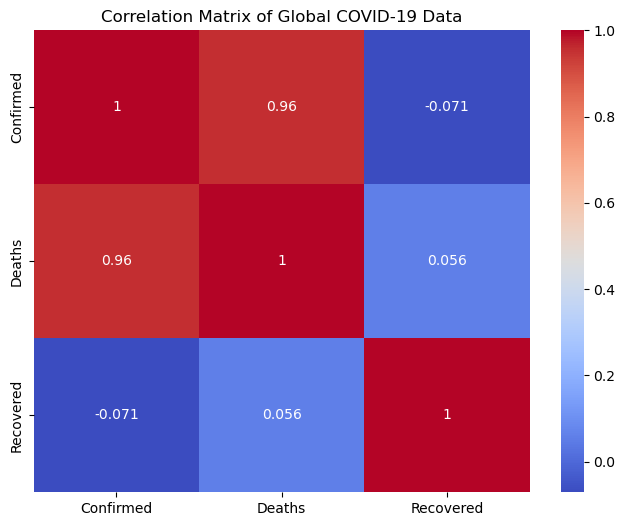

In [8]:
#7. What is the correlation between confirmed cases, deaths, and recoveries globally?
correlation_matrix = global_df[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Global COVID-19 Data')
plt.show()


In [10]:
#8. How do lockdown measures impact the trend of confirmed cases in different countries?
lockdown_data = pd.DataFrame({
    'Country': ['Italy', 'United States', 'Spain', 'Germany', 'France'],
    'Lockdown_Start': ['2020-03-10', '2020-03-20', '2020-03-14', '2020-03-22', '2020-03-17'],
    'Lockdown_End': ['2020-06-10', '2020-06-20', '2020-06-14', '2020-06-22', '2020-06-17']
})
lockdown_data['Lockdown_Start'] = pd.to_datetime(lockdown_data['Lockdown_Start'])
lockdown_data['Lockdown_End'] = pd.to_datetime(lockdown_data['Lockdown_End'])

merged_df = pd.merge(df, lockdown_data, on='Country', how='left')


In [11]:
testing_data = pd.DataFrame({
    'Country': ['Italy', 'United States', 'Spain', 'Germany', 'France'],
    'Date': ['2020-03-10', '2020-03-20', '2020-03-14', '2020-03-22', '2020-03-17'],
    'Tests': [100000, 200000, 150000, 180000, 170000]
})
testing_data['Date'] = pd.to_datetime(testing_data['Date'])

merged_df = pd.merge(merged_df, testing_data, on=['Country', 'Date'], how='left')


In [12]:
continent_data = pd.DataFrame({
    'Country': ['Italy', 'United States', 'Spain', 'Germany', 'France'],
    'Continent': ['Europe', 'North America', 'Europe', 'Europe', 'Europe']
})

merged_df = pd.merge(merged_df, continent_data, on='Country', how='left')


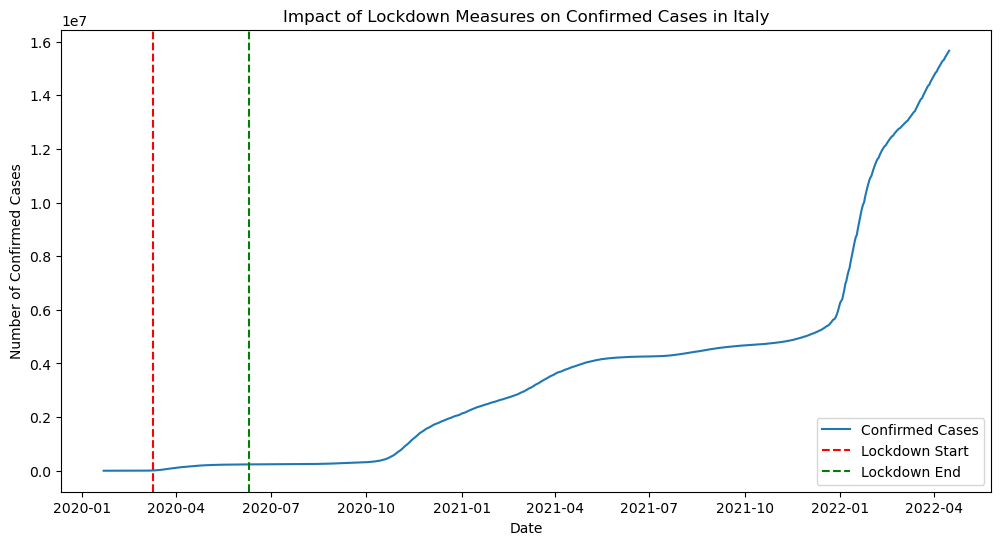

In [13]:
country = 'Italy'  
country_data = merged_df[merged_df['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases')
plt.axvline(country_data['Lockdown_Start'].iloc[0], color='red', linestyle='--', label='Lockdown Start')
plt.axvline(country_data['Lockdown_End'].iloc[0], color='green', linestyle='--', label='Lockdown End')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.title(f'Impact of Lockdown Measures on Confirmed Cases in {country}')
plt.legend()
plt.show()


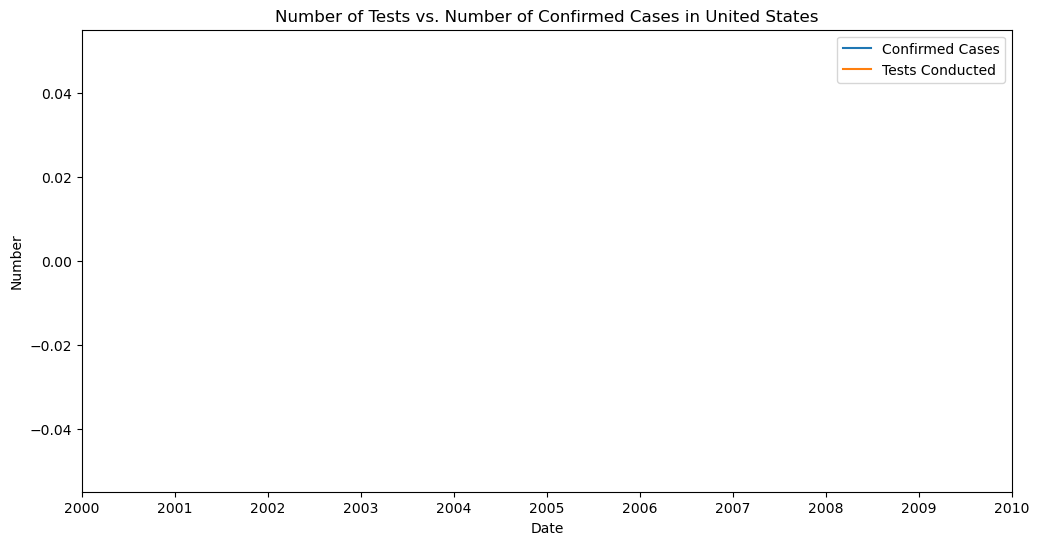

In [14]:
#9. How does the number of tests conducted relate to the number of confirmed cases in various countries?
country = 'United States'  # Specify the country
country_data = merged_df[merged_df['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases')
plt.plot(country_data['Date'], country_data['Tests'], label='Tests Conducted')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title(f'Number of Tests vs. Number of Confirmed Cases in {country}')
plt.legend()
plt.show()



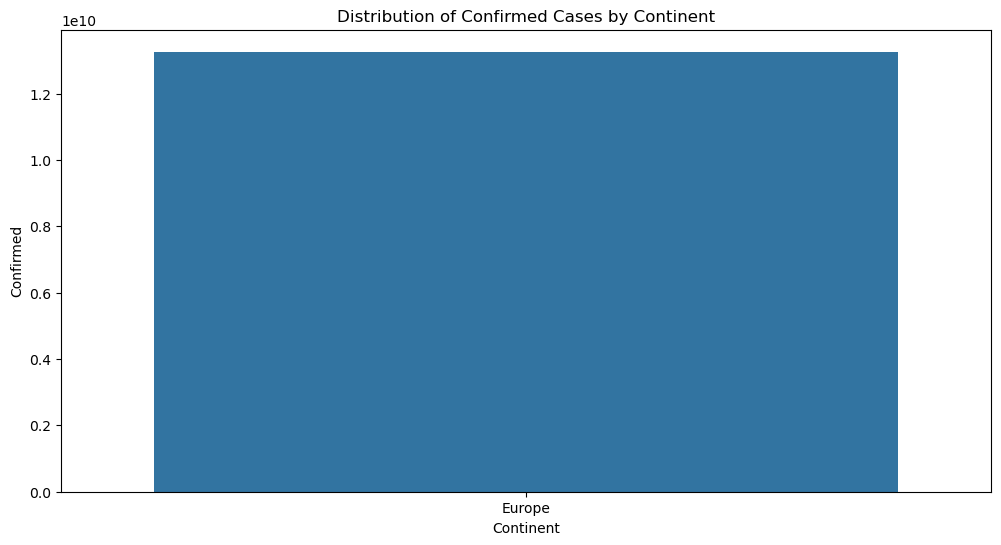

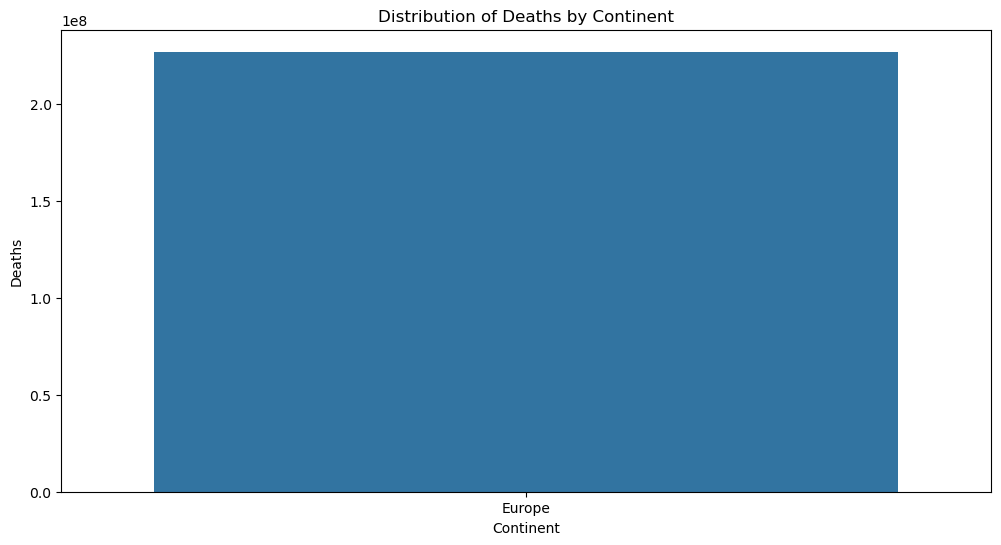

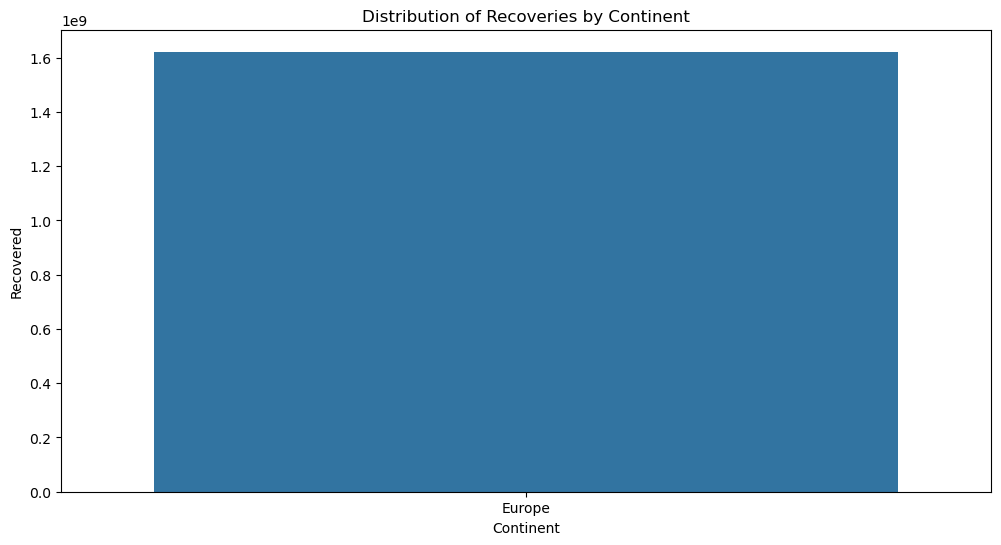

In [15]:
#10. What is the distribution of confirmed cases, deaths, and recoveries by continent?
continent_summary = merged_df.groupby('Continent')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Confirmed', data=continent_summary)
plt.title('Distribution of Confirmed Cases by Continent')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Deaths', data=continent_summary)
plt.title('Distribution of Deaths by Continent')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Recovered', data=continent_summary)
plt.title('Distribution of Recoveries by Continent')
plt.show()
